## Time Series Assignment 5 - Forecasting Unemployment Rates
##### Dan Quasney [@DQOfficial](https://github.com/DQOfficial)

The assignment can be found [here](http://people.stern.nyu.edu/churvich/Forecasting/Homework/HW5.pdf)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults, ARIMAResults
from matplotlib.pyplot import acorr
import sys
print sys.version
import seaborn as sns
%pylab inline

2.7.11 (default, Dec  5 2015, 14:44:47) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.1.76)]
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# read in data
data = pd.read_csv('http://people.stern.nyu.edu/churvich/Forecasting/Data/UNEMPLOYMENT.CSV')

# reformat data and take the log of the unemployment rate
data.rename(columns = {'DATE':'date','UNEMPLOYMENT':'unemp'},inplace = True)
data['date'] = pd.to_datetime(data.date)
data['log_unemp'] = log(data.unemp)
data.head()

,date,unemp,log_unemp
0,1948-01-01,3.4,1.223775
1,1948-02-01,3.8,1.335001
2,1948-03-01,4.0,1.386294
3,1948-04-01,3.9,1.360977
4,1948-05-01,3.5,1.252763


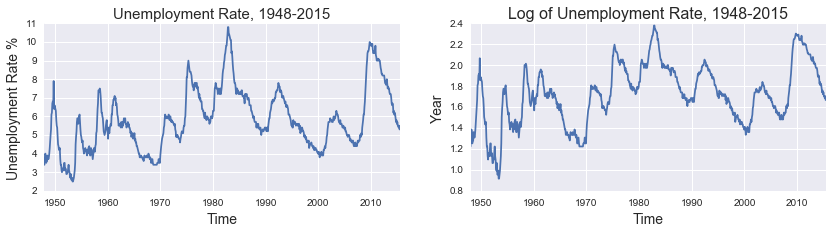

In [4]:
# exploratory plots of our dataframe
# create subplot
ax, fig = plt.subplots(figsize = (14,3))

# plot unemployment rate first
plt.subplot(121)
plt.plot(data.date, data.unemp)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Unemployment Rate %', fontsize = 14)
plt.title('Unemployment Rate, 1948-2015', fontsize = 15)

# then plot the log
plt.subplot(122)
plt.plot(data.date, data.log_unemp)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Year', fontsize = 14)
plt.title('Log of Unemployment Rate, 1948-2015', fontsize = 16)

## A) For the log of the Unemployment series, use the ACF, PACF and AICC to identify an ARIMA model (perhaps including a constant term).

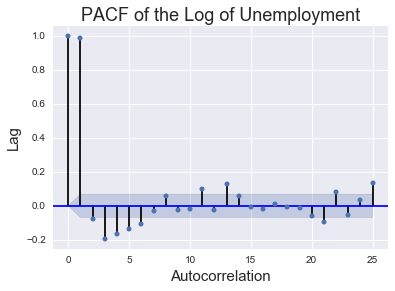

In [5]:
# plot the PACF of the log of unemployment
# first create an array of the unemployment rate
pacf_array = data.log_unemp.as_matrix()

# then plot it
plot_pacf(pacf_array, lags = 25)
plt.xlabel('Autocorrelation', fontsize = 15)
plt.ylabel('Lag', fontsize = 15)
plt.title('PACF of the Log of Unemployment', fontsize = 18)

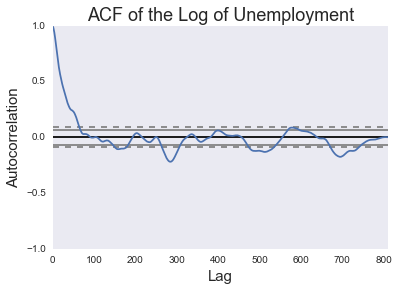

In [6]:
# then we'll do the autocorrelation plot
autocorrelation_plot(data.log_unemp)
plt.xlabel('Lag', fontsize = 15)
plt.ylabel('Autocorrelation', fontsize = 15)
plt.title('ACF of the Log of Unemployment', fontsize= 18)

## B) Estimate the parameters. Are they all statistically significant? Do you think that a constant should be included in the model?

#### The results of the PACF are somewhat unclear, as it returns a sudden dropff off after lag = 2, but then continues to be statistically significant (albeit less so) through lag = 6. However, the difficulty is that the autcorrelation at lag = 3 is very close to not being statistically significant. Consequently, I estimate the model to be ARIMA(2,0,0) _or_ ARIMA(6,0,0). 

#### We will use AIC to help us decide which is the better choice.

In [7]:
# fit the ARIMA model for for ARIMA(2,0,0)
unemp_array = data.log_unemp.as_matrix()
ar2_model = ARIMA(unemp_array, (2,0,0)).fit()
print ar2_model.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  810
Model:                     ARMA(2, 0)   Log Likelihood                1497.946
Method:                       css-mle   S.D. of innovations              0.038
Date:                Tue, 22 Mar 2016   AIC                          -2987.892
Time:                        15:39:24   BIC                          -2969.104
Sample:                             0   HQIC                         -2980.679
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.6716      0.126     13.285      0.000         1.425     1.918
ar.L1.y        1.1289      0.035     32.284      0.000         1.060     1.197
ar.L2.y       -0.1387      0.035     -3.962      0.0

In [8]:
# then fit it for ARIMA(6,0,0)
unemp_array = data.log_unemp.as_matrix()
ar6_model = ARIMA(unemp_array, (6,0,0)).fit()
print ar6_model.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  810
Model:                     ARMA(6, 0)   Log Likelihood                1543.339
Method:                       css-mle   S.D. of innovations              0.036
Date:                Tue, 22 Mar 2016   AIC                          -3070.678
Time:                        15:39:24   BIC                          -3033.101
Sample:                             0   HQIC                         -3056.251
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7025      0.070     24.369      0.000         1.566     1.839
ar.L1.y        1.0283      0.035     29.261      0.000         0.959     1.097
ar.L2.y        0.1457      0.050      2.887      0.0

The results of the PACF are somewhat unclear, as it returns a sudden drop off after lag = 2, but then continues to be statistically significant (albeit less so) through lag = 6. However, the difficulty is that the autcorrelation at lag = 3 is very close to not being statistically significant. Consequently, I estimate the model to be ARIMA(2,0,0) or ARIMA(6,0,0). We will use AIC to help us decide which is the better choice.

If our ARIMA(2,0,0) fit our data as well as the ARIMA(6,0,0), we would want to choose it because it is the more parsimonious of the two. If it is unclear whether they produce the same results, we can use the AIC value to help us decide. Looking at the printouts, we see that the ARIMA(6,0,0) model returns a lower AIC value of -3070.678 than the ARIMA(2,0,0) value of 2987.892. Consequently, we will use ARIMA(6,0,0) to describe this time series. The printouts of both models are on the next page.

This model should not include a constant because we see statistical significance in the ACF and PACF, meaning that this time series is not a random walk.


## C) Write the complete form of the fitted model. 

Using the coefficients from the ARIMA(6,0,0) results, I can determine that the complete form of the fitted model. Since the coefficients at lags 3, 4, and 5 are not statistically significant, they have been omitted from the equation.

## D) Examine the Ljung-Box statistics for lack of fit. Does the model seem to be adequate? 

In [9]:
import statsmodels.stats.diagnostic
from pypr.stattest.ljungbox import *
import scipy.stats

In [10]:
# predict our ARIMA(6,0,0) model
pred = ar6_model.predict()
# then use ljung-box on our prediction
statsmodels.stats.diagnostic.acorr_ljungbox(pred, lags=10, boxpierce=False)

(array([  794.51490711,  1565.35334636,  2307.54169872,  3016.56600117,
         3686.29126695,  4315.07760194,  4901.5101917 ,  5446.37972206,
         5949.45675684,  6411.65570095]),
 array([  8.40667303e-175,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000]))

Using the Ljung-Box function in Python’s StatsModels package for 10 lags, I am able to measure both the autocorrelation and the significance at a given lag. Since all p-values are < 0.05, this model is inadequate for predicting the log of the US unemployment rate.


## E) Plot the residuals from the fitted model, as well as the ACF and PACF of the residuals. Do these plots indicate any inadequacies in the model?

In [11]:
# calculate the residuals (or errors)
data['errors'] = data.log_unemp - pred
data.head()

,date,unemp,log_unemp,errors
0,1948-01-01,3.4,1.223775,-0.478716
1,1948-02-01,3.8,1.335001,0.107046
2,1948-03-01,4.0,1.386294,0.032311
3,1948-04-01,3.9,1.360977,-0.061851
4,1948-05-01,3.5,1.252763,-0.141650


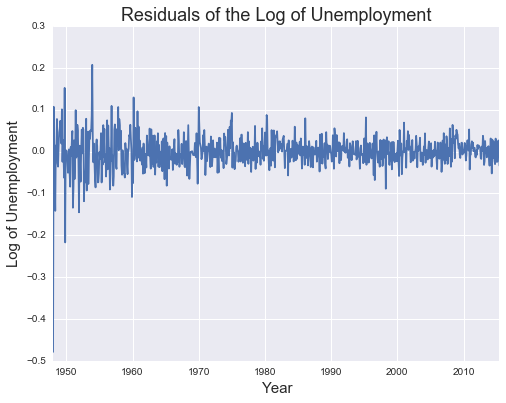

In [12]:
# then plot them 
fig, ax = plt.subplots(figsize = (8,6))
plt.plot(data.date, data.errors)
plt.title('Residuals of the Log of Unemployment', fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Log of Unemployment', fontsize = 15)

# the model struggles to predict the rate way far in the past, but it gets more accurate as we move closer to today

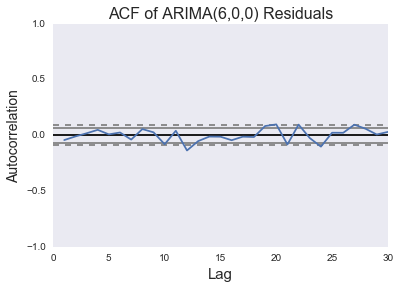

In [13]:
# plotting the ACF of the errors
autocorrelation_plot(data.errors)
plt.xlim(0,30)
plt.title('ACF of ARIMA(6,0,0) Residuals', fontsize = 16)
plt.ylabel('Autocorrelation',fontsize = 14)
plt.xlabel('Lag', fontsize = 15)

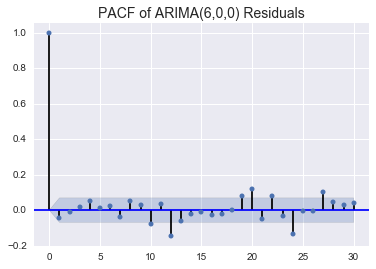

In [14]:
# then plot the PACF of the errors
plot_pacf(data.errors, lags = 30)
plt.title('PACF of ARIMA(6,0,0) Residuals', fontsize = 14)

## F) Obtain forecasts and 95% forecast intervals for lead times 1 to 30.

In [15]:
# obtain forecast values
periods = 30
predict = ar6_model.forecast(periods)[0]
forecast = ar6_model.forecast(periods)
forecast

(array([ 1.66315803,  1.65756289,  1.65134782,  1.64951247,  1.64341023,
         1.64193806,  1.64030812,  1.639282  ,  1.6391043 ,  1.63891087,
         1.63953   ,  1.64031916,  1.64140068,  1.64272543,  1.64418216,
         1.64582136,  1.64754401,  1.64934966,  1.65120956,  1.65309799,
         1.65500586,  1.65691114,  1.65880518,  1.6606766 ,  1.66251665,
         1.66431915,  1.66607779,  1.66778865,  1.6694482 ,  1.67105396]),
 array([ 0.0358976 ,  0.05148999,  0.06720459,  0.08249883,  0.0972588 ,
         0.11277376,  0.12696069,  0.14046058,  0.15313127,  0.16497506,
         0.17607581,  0.18632672,  0.19581841,  0.20456745,  0.21261369,
         0.22000076,  0.22676088,  0.23294031,  0.23857729,  0.24371146,
         0.24838081,  0.2526209 ,  0.25646651,  0.25994982,  0.26310129,
         0.26594938,  0.26852056,  0.27083944,  0.27292878,  0.27480961]),
 array([[ 1.59280002,  1.73351603],
        [ 1.55664436,  1.75848141],
        [ 1.51962925,  1.78306638],
        [ 1.

## G) Plot the data, forecasts and forecast intervals on a single plot.

In [27]:
# then prepare a dataframe that includes the output of the ljung-box test 
# we will use this when plotting the actuals, forecast, and confidence intervals on one graph
df = pd.DataFrame(forecast[2], columns = ['lower','upper'])
df['forecast'] = forecast[0]
df['date'] = pd.date_range(data.date.iloc[-1], periods = periods, freq = 'M')
df

,lower,upper,forecast,date
0,1.592800,1.733516,1.663158,2015-06-30
1,1.556644,1.758481,1.657563,2015-07-31
2,1.519629,1.783066,1.651348,2015-08-31
3,1.487818,1.811207,1.649512,2015-09-30
4,1.452786,1.834034,1.643410,2015-10-31
5,1.420906,1.862971,1.641938,2015-11-30
6,1.391470,1.889146,1.640308,2015-12-31
7,1.363984,1.914580,1.639282,2016-01-31
8,1.338973,1.939236,1.639104,2016-02-29
9,1.315566,1.962256,1.638911,2016-03-31


In [17]:
# fill historical forecast values with blanks since forecasts look forward
data['forecast'] = 'NaN'

In [18]:
# append them to make a continuous time series including actual and forecasted values
df2 = data.append(df)
df2.tail()

,date,errors,forecast,log_unemp,lower,unemp,upper
25,2017-07-31,NaN,1.66432,NaN,1.143068,NaN,2.185570
26,2017-08-31,NaN,1.66608,NaN,1.139787,NaN,2.192368
27,2017-09-30,NaN,1.66779,NaN,1.136953,NaN,2.198624
28,2017-10-31,NaN,1.66945,NaN,1.134518,NaN,2.204379
29,2017-11-30,NaN,1.67105,NaN,1.132437,NaN,2.209671


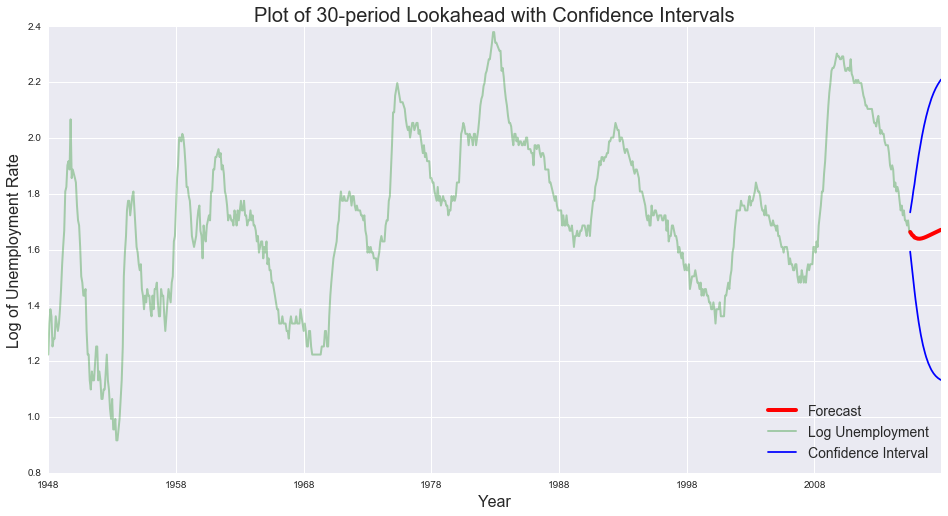

In [19]:
# plot our awesome graph!
fig, ax = plt.subplots(figsize = (16,8))
plt.plot(df2.date, df2.forecast, linewidth = 4, c = 'red', label = 'Forecast')
plt.plot(df2.date, df2.log_unemp, linewidth = 2, c = 'green', alpha = 0.3, label = 'Log Unemployment')
plt.plot(df2.date, df2.lower, c = 'blue', label = 'Confidence Interval')
plt.plot(df2.date, df2.upper, c = 'blue', label = '')
plt.title('Plot of 30-period Lookahead with Confidence Intervals', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Log of Unemployment Rate', fontsize = 16)
plt.legend(loc = 4, fontsize = 14)

## H) Do the forecasts seem reasonable? Do the forecast intervals seem excessively wide?

The forecasts for this model seem reasonable for the immediate future and predict a slight increase in the unemployment rate, but the model’s accuracy becomes highly suspect as we move further into the future, as seen by the confidence intervals that widen very rapidly as we move ahead. If we forecast beyond 30 periods (not shown) we see the unemployment revert back to and then settle at the mean in perpetuity, which we almost see at 30.  
